<a href="https://colab.research.google.com/github/syedhussain07/Smokingskills/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/startup_funding.csv')




df['Investors Name']= df['Investors Name'].fillna('Undisclosed')
sorted(df['Investors Name'].unique().tolist())
sorted(df['Startup Name'].unique().tolist())
df.drop(columns=['Remarks'], inplace = True)
df.set_index('Sr No', inplace = True)
df['Amount in USD'] = df['Amount in USD'].fillna('0')

df['Amount in USD'] = df['Amount in USD'].str.replace(',','')
df['Amount in USD'] = df['Amount in USD'].str.replace('undisclosed','0')
df['Amount in USD'] = df['Amount in USD'].str.replace('unknown','0')
df['Amount in USD'] = df['Amount in USD'].str.replace('Undisclosed','0')
df = df[df['Amount in USD'].str.isdigit()]
df['Amount in USD'] = df['Amount in USD'].astype('float')


# Handle 'Amount in USD' column
df['Amount in USD'] = pd.to_numeric(df['Amount in USD'], errors='coerce')

# Correct and parse dates

df['Date dd/mm/yyyy'] = df['Date dd/mm/yyyy'].str.replace('05/072018','05/07/2018')
df['Date dd/mm/yyyy'] = pd.to_datetime(df['Date dd/mm/yyyy'], errors = 'coerce')
df['Date dd/mm/yyyy'].dt.month
df['Date dd/mm/yyyy'].dt.day

df['Date dd/mm/yyyy'] = pd.to_datetime(df['Date dd/mm/yyyy'], errors='coerce')

df['Investors Name'] = df['Investors Name'].fillna('Undisclosed')

df.rename(columns={
    'Date dd/mm/yyyy':'Date',

    'InvestmentnType':'Investment Type',


},inplace=True)

# Calculate median values for each 'Industry Vertical' excluding 0
median_values_by_industry = df[df['Amount in USD'] != 0].groupby('Industry Vertical')['Amount in USD'].median()

# Function to replace 0 values in 'Amount in USD' with the median of the corresponding 'Industry Vertical'
def replace_zero_with_industry_median(row):
    if row['Amount in USD'] == 0:
        return median_values_by_industry.get(row['Industry Vertical'], 0)
    else:
        return row['Amount in USD']

# Applying the function to the DataFrame
df['Amount in USD'] = df.apply(replace_zero_with_industry_median, axis=1)

# Calculate median values for each 'SubVertical' excluding 0
median_values_by_subvertical = df[df['Amount in USD'] != 0].groupby('SubVertical')['Amount in USD'].median()

# Function to replace 0 values in 'Amount in USD' with the median of the corresponding 'SubVertical'
def replace_zero_with_subvertical_median(row):
    if row['Amount in USD'] == 0:
        return median_values_by_subvertical.get(row['SubVertical'], 0)
    else:
        return row['Amount in USD']

# Applying the function to the DataFrame
df['Amount in USD'] = df.apply(replace_zero_with_subvertical_median, axis=1)

# Calculate median values for each 'Investment Type' excluding 0
median_values_by_investment_type = df[df['Amount in USD'] != 0].groupby('Investment Type')['Amount in USD'].median()

# Function to replace 0 values in 'Amount in USD' with the median of the corresponding 'Investment Type'
def replace_zero_with_investment_type_median(row):
    if row['Amount in USD'] == 0:
        return median_values_by_investment_type.get(row['Investment Type'], 0)
    else:
        return row['Amount in USD']

# Applying the function to the DataFrame
df['Amount in USD'] = df.apply(replace_zero_with_investment_type_median, axis=1)



# Replace 'path_to_your_file.csv' with the actual path to your dataset
for col in df.select_dtypes(include=['float64', 'int64']):
    df[col] = df[col].fillna(df[col].median())

# Removing Outliers
for col in df.select_dtypes(include=['float64', 'int64']):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]

df = df.dropna(subset=['Date','Startup Name','Industry Vertical','City  Location','Investors Name','Investment Type'])

df.to_csv('Startup_funding_cleanedData.csv', index=False)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2465 entries, 2 to 2873
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               2465 non-null   datetime64[ns]
 1   Startup Name       2465 non-null   object        
 2   Industry Vertical  2465 non-null   object        
 3   SubVertical        1809 non-null   object        
 4   City  Location     2465 non-null   object        
 5   Investors Name     2465 non-null   object        
 6   Investment Type    2465 non-null   object        
 7   Amount in USD      2465 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 173.3+ KB


<ipython-input-7-084a4ffb0717>:29: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date dd/mm/yyyy'] = pd.to_datetime(df['Date dd/mm/yyyy'], errors = 'coerce')


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load the dataset
df = pd.read_csv('/content/Startup_funding_cleanedData.csv')

# Selecting categorical and numerical columns for transformation
categorical_columns = ['Industry Vertical', 'Investment Type','SubVertical','Investors Name','City  Location']
numerical_columns = ['Amount in USD']

# Applying Label Encoding to categorical columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col + '_encoded'] = label_encoder.fit_transform(df[col])

# # Applying One-Hot Encoding to categorical columns
# # This creates new binary columns for each category in the categorical columns
# one_hot_encoder = OneHotEncoder()
# df_one_hot = pd.get_dummies(df, columns=categorical_columns)

# Applying StandardScaler to scale numerical columns
scaler = StandardScaler()
df['Amount in USD_normalized'] = scaler.fit_transform(df[['Amount in USD']])

# Now df contains label encoded columns and scaled numerical columns
# df_one_hot contains one-hot encoded columns

# Save the transformed dataset if needed
df.to_csv('New_transformed_dataset_label_encoded.csv', index=False)
# df_one_hot.to_csv('transformed_dataset_one_hot_encoded.csv', index=False)
df_label_encoded_head = df.head(200)
# df_one_hot_head = df_one_hot.head()

df_label_encoded_head

,Date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,Investment Type,Amount in USD,Industry Vertical_encoded,Investment Type_encoded,SubVertical_encoded,Investors Name_encoded,City Location_encoded,Amount in USD_normalized
0,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0,625,29,62,1654,30,2.530410
1,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0,195,14,1044,1845,58,0.397798
2,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0,191,22,426,1605,52,-0.109122
3,2020-01-13,Pando,Logistics,"Open-market, freight management platform",Chennai,Chiratae Ventures,Series A,9000000.0,325,26,1241,383,20,2.932401
4,2019-12-12,Ecozen,Technology,Agritech,Pune,Sathguru Catalyzer Advisors,Series A,6000000.0,622,26,44,1504,68,1.665100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2018-04-22,Visit,Healthcare,AI Driven Health tech Platform,Delhi,"Biz Stone, Kunal Bahl, Rohit Bansal, Alagu Per...",Private Equity,2550000.0,244,15,8,297,24,0.207703
196,2018-04-22,Doxper,Healthcare,Digitized Health-Tech Solutions For Practitioners,Mumbai,Vidal Healthcare,Seed / Angel Funding,1900000.0,244,18,364,1826,52,-0.066879
197,2018-04-22,Nykaa,Consumer Internet,Beauty e-tailer,Mumbai,"Sunil Munjal, Harsh Mariwala, Dalip Pathak and...",Private Equity,11000000.0,88,15,134,1649,52,3.777269
198,2018-04-23,Mihuru,Finance,Online Platform Providing Micro Loans For Air ...,Mumbai,Undisclosed,Seed / Angel Funding,150000.0,197,18,1114,1733,52,-0.806138


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


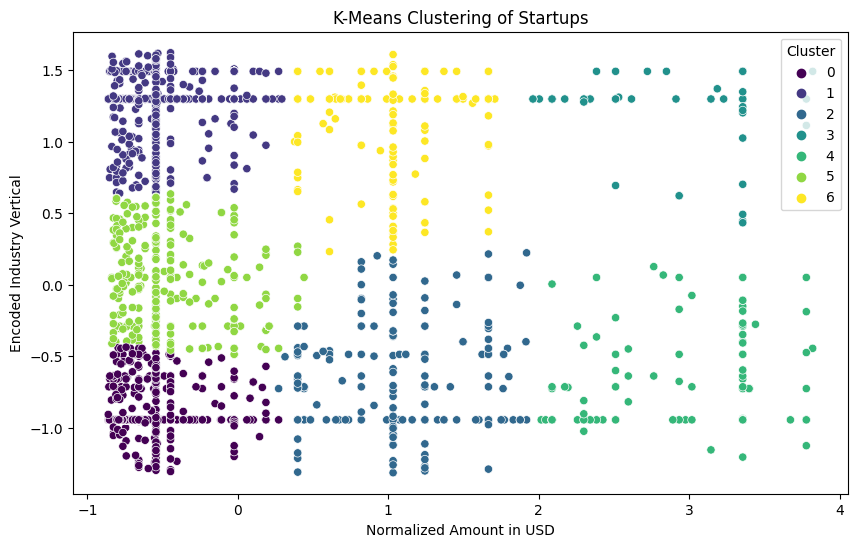

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('/content/transformed_dataset_label_encoded.csv')

# Select features for clustering
features = ['Amount in USD', 'Industry Vertical_encoded']  # Adjust these based on your dataset

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# Applying K-Means Clustering
kmeans = KMeans(n_clusters=7, random_state=0)  # Adjust the number of clusters as needed
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('K-Means Clustering of Startups')
plt.xlabel('Normalized Amount in USD')
plt.ylabel('Encoded Industry Vertical')
plt.legend(title='Cluster')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


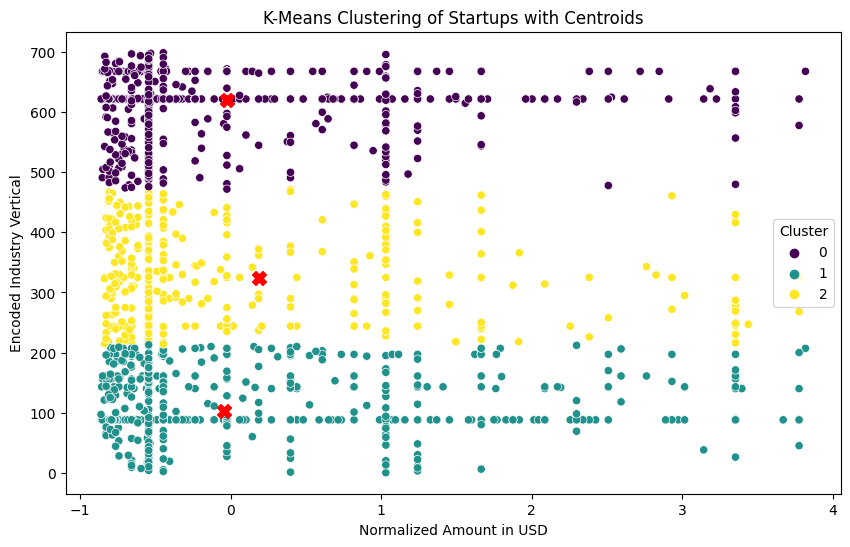

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load your dataset
df = pd.read_csv('/content/transformed_dataset_label_encoded.csv')

# Use StandardScaler only for 'Amount in USD_normalized'
scaler = StandardScaler()
df['Amount in USD_scaled'] = scaler.fit_transform(df[['Amount in USD_normalized']])

# Now create the feature array for K-Means clustering
# Note that we don't scale 'Industry Vertical_encoded' and 'Investment Type_encoded'
X = df[['Amount in USD_scaled', 'Industry Vertical_encoded', 'Investment Type_encoded']].values

# Applying K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=0)  # Adjust the number of clusters as needed
clusters = kmeans.fit_predict(X)
df['Cluster'] = clusters

# Extracting centroids
centroids = kmeans.cluster_centers_

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Amount in USD_scaled', y='Industry Vertical_encoded', hue='Cluster', data=df, palette='viridis')

# Plotting centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='red', marker='X')

plt.title('K-Means Clustering of Startups with Centroids')
plt.xlabel('Normalized Amount in USD')
plt.ylabel('Encoded Industry Vertical')
plt.legend(title='Cluster')
plt.show()


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/transformed_dataset_label_encoded.csv')

# Dictionary of encoded columns and their original column names
encoded_columns = {
    'Industry Vertical_encoded': 'Industry Vertical',
    'Investment Type_encoded': 'Investment Type',
    'SubVertical_encoded': 'SubVertical'
}

# Loop through the dictionary to create and save separate mapping files for each encoded column
for encoded_col, original_col in encoded_columns.items():
    # Extract the unique pairs of original and encoded values
    unique_pairs = df[[original_col, encoded_col]].drop_duplicates()

    # Define the CSV filename for the mapping based on the encoded column
    csv_filename = f'{original_col}_to_{encoded_col}_mapping.csv'

    # Save the unique pairs to a CSV file
    unique_pairs.to_csv('/content/'+csv_filename, index=False, header=True)

    # Print out a confirmation message
    print(f"Mapping for {original_col} saved to {csv_filename}")


Mapping for Industry Vertical saved to Industry Vertical_to_Industry Vertical_encoded_mapping.csv
Mapping for Investment Type saved to Investment Type_to_Investment Type_encoded_mapping.csv
Mapping for SubVertical saved to SubVertical_to_SubVertical_encoded_mapping.csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-46-39cea3c8655a>:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_stats = data.groupby('Cluster').mean().reset_index()


Cluster Statistics:
   Cluster  Amount in USD  Industry Vertical_encoded  Investment Type_encoded  \
0        0   9.432487e+05                 313.072372                18.724247   
1        1   8.979162e+06                 287.063694                15.184713   
2        2   4.526400e+06                 322.732530                16.026506   

   SubVertical_encoded  Amount in USD_normalized  
0          1062.158479                 -0.471043  
1          1085.554140                  2.923598  
2          1144.493976                  1.042601  


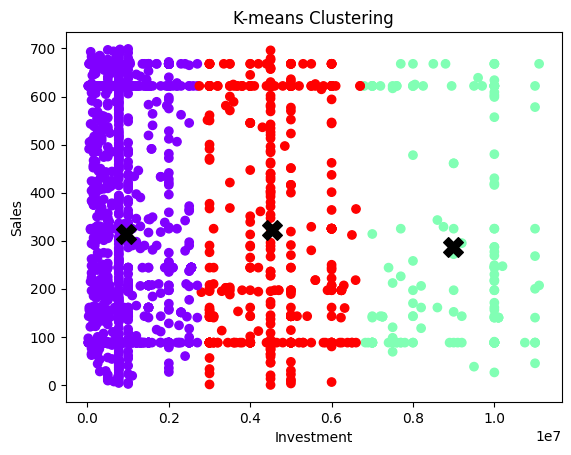

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


data = pd.read_csv('/content/transformed_dataset_label_encoded.csv')
X = data[['Amount in USD', 'Industry Vertical_encoded']]

num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X)
cluster_labels = kmeans.labels_
data['Cluster'] = cluster_labels
cluster_centers = kmeans.cluster_centers_

cluster_stats = data.groupby('Cluster').mean().reset_index()
print("Cluster Statistics:")
print(cluster_stats)

plt.scatter(X['Amount in USD'], X['Industry Vertical_encoded'], c=cluster_labels, cmap='rainbow')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='X', s=200, c='black')
plt.xlabel('Investment')
plt.ylabel('Sales')
plt.title('K-means Clustering')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


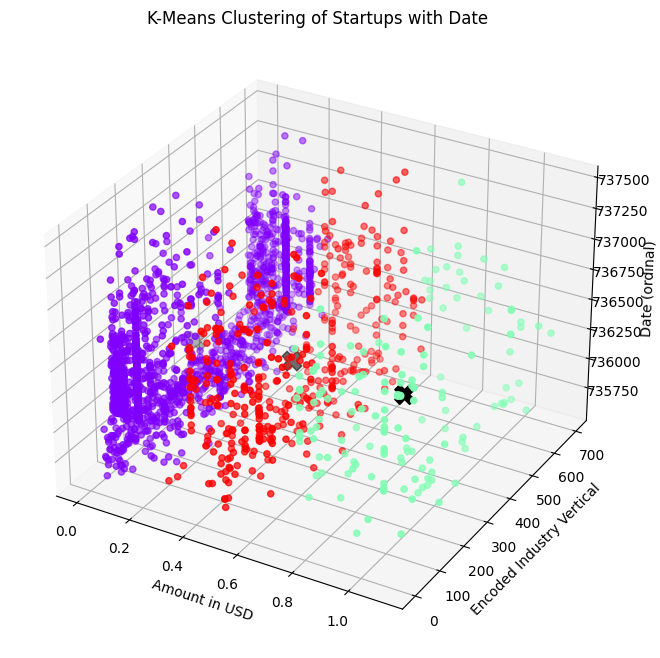

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
data = pd.read_csv('/content/transformed_dataset_label_encoded.csv')

# Prepare the 'Date' column for clustering
# If 'Date' is a string, you'll need to convert it to datetime and then to a numeric format
data['Date'] = pd.to_datetime(data['Date'])
data['Date_ordinal'] = data['Date'].apply(lambda date: date.toordinal())

# Select features for clustering, including the date in its numeric form
X = data[['Amount in USD', 'Industry Vertical_encoded', 'Date_ordinal']]

# Define the number of clusters
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(X)
cluster_labels = kmeans.labels_
data['Cluster'] = cluster_labels
cluster_centers = kmeans.cluster_centers_

# Plotting the clusters using a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for clusters
ax.scatter(X['Amount in USD'], X['Industry Vertical_encoded'], X['Date_ordinal'], c=cluster_labels, cmap='rainbow')

# Scatter plot for centroids
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2], marker='X', s=200, c='black')

# Setting labels
ax.set_xlabel('Amount in USD')
ax.set_ylabel('Encoded Industry Vertical')
ax.set_zlabel('Date (ordinal)')

# Title of the plot
plt.title('K-Means Clustering of Startups with Date')

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-11-aced1fc220b5>:38: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(cluster_data['Amount in USD'], cluster_data['Industry Vertical_encoded'], cluster_data['Year'],


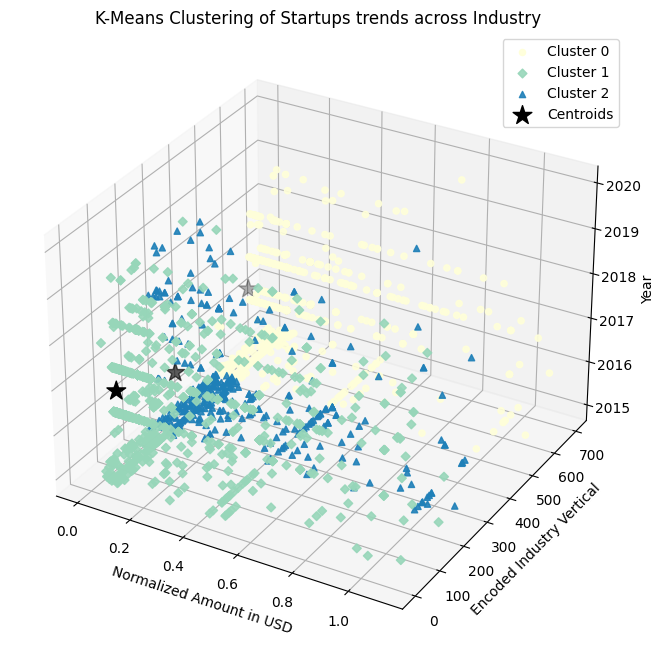

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
data = pd.read_csv('/content/Finalised Dataset.csv')

# Ensure 'Date' is in a datetime format if not already
data['Date'] = pd.to_datetime(data['Date'])

# Extract the year from the 'Date' to use in clustering
data['Year'] = data['Date'].dt.year

# Select features for clustering, including the year
X = data[['Amount in USD_normalized', 'Industry Vertical_encoded', 'Year']]

# Define the number of clusters
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(X)
cluster_labels = kmeans.labels_
data['Cluster'] = cluster_labels
cluster_centers = kmeans.cluster_centers_

# Define custom markers for each cluster
markers = ['o', 'D', '^']  # Example: 'o' for circle, 's' for square, '^' for triangle

# Plotting the clusters using a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')



# Scatter plot for clusters with custom markers
for cluster in range(num_clusters):
    cluster_data = data[data['Cluster'] == cluster]
    ax.scatter(cluster_data['Amount in USD'], cluster_data['Industry Vertical_encoded'], cluster_data['Year'],
               c=plt.cm.YlGnBu(cluster / num_clusters), alpha=0.9, label=f'Cluster {cluster}', marker=markers[cluster])  # alpha set to 0.5 for lighter colors


# Scatter plot for centroids with a star marker
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2],
           marker='*', s=200, c='black', label='Centroids')

# Setting labels
ax.set_xlabel('Normalized Amount in USD')
ax.set_ylabel('Encoded Industry Vertical')
ax.set_zlabel('Year',rotation=90)

# Adding legend
ax.legend()

# Title of the plot
plt.title('K-Means Clustering of Startups trends across Industry')

# Show the plot
plt.show()


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
data = pd.read_csv('/content/updated_dataset_with_cart_predictions.csv')

# Ensure 'Date' is in a datetime format if not already
data['Date'] = pd.to_datetime(data['Date'])

# Extract the year from the 'Date' to use in clustering
data['Year'] = data['Date'].dt.year

# Select features for clustering, including the year
X = data[['Amount in USD_normalized', 'Industry Vertical_encoded', 'Year']]

# Define the number of clusters
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(X)
cluster_labels = kmeans.labels_
data['Cluster'] = cluster_labels
cluster_centers = kmeans.cluster_centers_

# Final Cluster Centers
final_cluster_centers = pd.DataFrame(cluster_centers, columns=['Amount in USD_normalized', 'Industry Vertical_encoded', 'Year'])

# Distance between final cluster centers
distances = cdist(cluster_centers, cluster_centers, 'euclidean')
distance_matrix = pd.DataFrame(distances, columns=[f'Cluster {i}' for i in range(num_clusters)],
                               index=[f'Cluster {i}' for i in range(num_clusters)])

# Cluster Membership
cluster_membership = pd.DataFrame(cluster_labels, columns=['Cluster Label'])

# Output the tables
print("Final Cluster Centers")
print(final_cluster_centers)
print("\nDistance Between Final Cluster Centers")
print(distance_matrix)
print("\nCluster Membership")
print(cluster_membership)
final_cluster_centers.to_csv('Final_cluster_centers.csv', index=False)
distance_matrix.to_csv('Distance_matrix.csv')
cluster_membership.to_csv('Cluster_membership.csv', index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Final Cluster Centers
   Amount in USD_normalized  Industry Vertical_encoded         Year
0                 -0.025851                 619.927294  2016.257449
1                 -0.040579                 103.055377  2016.388443
2                  0.190132                 324.007895  2015.718421

Distance Between Final Cluster Centers
            Cluster 0   Cluster 1   Cluster 2
Cluster 0    0.000000  516.871934  295.919969
Cluster 1  516.871934    0.000000  220.953654
Cluster 2  295.919969  220.953654    0.000000

Cluster Membership
      Cluster Label
0                 0
1                 1
2                 1
3                 2
4                 0
...             ...
2460              0
2461              2
2462              1
2463              2
2464              0

[2465 rows x 1 columns]


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/updated_dataset_with_cart_predictions.csv')

# Extract 'Year' from 'Date' column
# Ensure the 'Date' column is in a datetime format
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Assuming you have a mapping file for 'Industry Vertical_encoded' to 'Industry Vertical',
# and you have already normalized 'Amount in USD' which is available in 'Amount in USD_normalized',
# the following code will select the relevant columns and save them to a new CSV file.

# Select the relevant columns to save in the new file
columns_to_save = ['Amount in USD_normalized', 'Amount in USD', 'Industry Vertical_encoded', 'Industry Vertical', 'Year']

# Create a new dataframe with these columns
startup_trend_df = df[columns_to_save]

# Save this dataframe to a new CSV file called StartupTrend.csv
startup_trend_df.to_csv('StartupTrend.csv', index=False)

print("The file 'StartupTrend.csv' has been created.")


The file 'StartupTrend.csv' has been created.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_optics.py:932: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
<ipython-input-16-6460c348aa9b>:28: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_stats = df.groupby('Cluster').mean().reset_index()


Cluster Statistics:
     Cluster  Amount in USD  Industry Vertical_encoded  \
0         -1   2.047411e+06                 291.899358   
1          0   7.939679e+06                 456.400000   
2          1   6.863333e+06                 309.333333   
3          2   6.000000e+06                 530.666667   
4          3   6.000000e+06                 176.000000   
..       ...            ...                        ...   
308      307   1.000000e+07                 622.000000   
309      308   1.000000e+07                 323.800000   
310      309   8.937500e+06                 280.750000   
311      310   1.101667e+07                 270.500000   
312      311   1.100000e+07                 205.200000   

     Investment Type_encoded  SubVertical_encoded  Investors Name_encoded  \
0                  17.980728           923.751606             1013.220557   
1                  17.800000            48.600000             1081.000000   
2                  19.666667            61.333333   

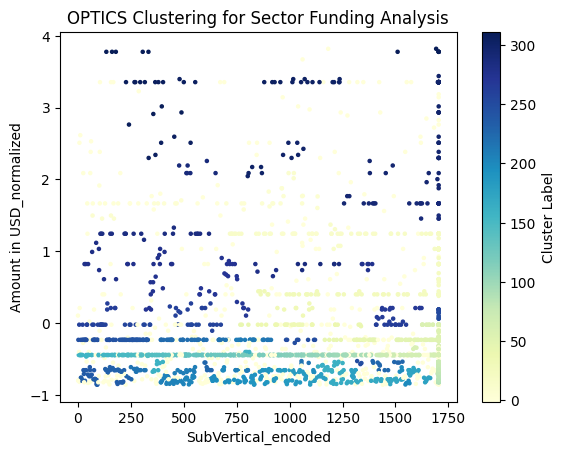

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/Finalised Dataset.csv')# Replace with your CSV file path

# Select only the 'SubVertical_encoded' and 'Amount in USD_normalized' columns for clustering
X = df[['SubVertical_encoded', 'Amount in USD_normalized']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# OPTICS clustering parameters
min_samples = 3  # Minimum number of samples in a neighborhood to consider a core point
xi = 0.04  # Determines the minimum steepness on the reachability plot

# Apply OPTICS clustering algorithm
optics = OPTICS(min_samples=min_samples, xi=xi)
cluster_labels = optics.fit_predict(X_scaled)

# Add the cluster labels to the dataframe
df['Cluster'] = cluster_labels

# Calculate and print cluster statistics
cluster_stats = df.groupby('Cluster').mean().reset_index()
print("Cluster Statistics:")
print(cluster_stats)

# Plotting the 2D scatter plot for 'SubVertical_encoded' and 'Amount in USD_normalized'
plt.scatter(df['SubVertical_encoded'], df['Amount in USD_normalized'], c=cluster_labels, cmap='YlGnBu',s=5)
plt.xlabel('SubVertical_encoded')
plt.ylabel('Amount in USD_normalized')
plt.title('OPTICS Clustering for Sector Funding Analysis')
plt.colorbar(label='Cluster Label')
plt.show()

for index, row in df.iterrows():
    subvertical_id = row['SubVertical_encoded']
    cluster_label = row['Cluster']
    #print(f'SubVertical ID: {subvertical_id}, Cluster Label: {cluster_label}')
# Save the DataFrame with cluster labels to a new CSV file
# df.to_csv('question3opticsclustered_data.csv', index=False)



In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/transformed_dataset_label_encoded.csv')

# Extract 'Year' from 'Date' column
# Ensure the 'Date' column is in a datetime format
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Assuming you have a mapping file for 'Industry Vertical_encoded' to 'Industry Vertical',
# and you have already normalized 'Amount in USD' which is available in 'Amount in USD_normalized',
# the following code will select the relevant columns and save them to a new CSV file.

# Select the relevant columns to save in the new file
columns_to_save = ['Amount in USD_normalized', 'Amount in USD', 'SubVertical_encoded', 'SubVertical', ]

# Create a new dataframe with these columns
startup_trend_df = df[columns_to_save]

# Save this dataframe to a new CSV file called StartupTrend.csv
startup_trend_df.to_csv('SubVerticalTrend.csv', index=False)

print("The file 'SubVertical.csv' has been created.")


The file 'SubVertical.csv' has been created.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
df = pd.read_csv('/content/transformed_dataset_label_encoded.csv')

# Calculate the total funding for each city
city_funding = df.groupby('City  Location')['Amount in USD'].sum().sort_values(ascending=False)

# Get the top 10 cities based on total funding
top_cities = city_funding.head(10).index.tolist()

# Create a binary target variable: 1 if the city is in the top 10, else 0
df['Top10City'] = df['City  Location'].apply(lambda x: 1 if x in top_cities else 0)

# Preparing the dataset for classification
# Select your features: these should be columns that can be used to predict the target
X = df[['Industry Vertical_encoded', 'SubVertical_encoded', 'Amount in USD_normalized']]  # Replace with your actual feature columns
y = df['Top10City']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Decision Tree Classifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

# Save the results or further analyze the model output as needed


Accuracy: 0.8012170385395537
              precision    recall  f1-score   support

           0       0.11      0.11      0.11        55
           1       0.89      0.89      0.89       438

    accuracy                           0.80       493
   macro avg       0.50      0.50      0.50       493
weighted avg       0.80      0.80      0.80       493



Accuracy: 0.9979716024340771

Classification Report:
                precision    recall  f1-score   support

Not Prominent       1.00      1.00      1.00       369
    Prominent       0.99      1.00      1.00       124

     accuracy                           1.00       493
    macro avg       1.00      1.00      1.00       493
 weighted avg       1.00      1.00      1.00       493



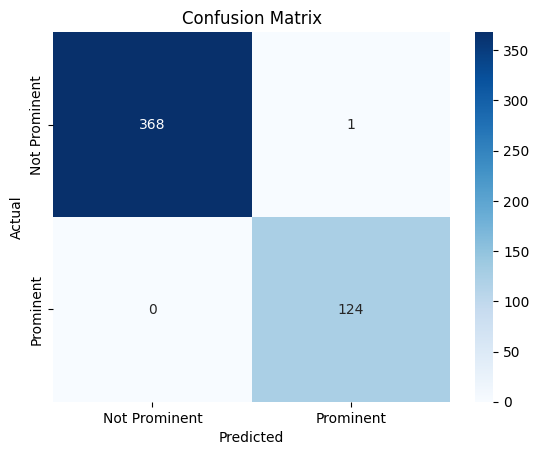

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/transformed_dataset_label_encoded.csv')

# Define a new column 'Prominent_Investor' based on your criteria
# For this example, we assume 'Amount in USD' represents the amount invested by each investor
# and we mark the top 25% as prominent

# First, calculate the 75th percentile threshold
threshold = data['Amount in USD'].quantile(0.75)

# Create the 'Prominent_Investor' column, where 1 represents a prominent investor and 0 otherwise
data['Prominent_Investor'] = data['Amount in USD'].apply(lambda x: 1 if x >= threshold else 0)

# Continue with your machine learning code
# Select features and target
X = data[['SubVertical_encoded', 'Amount in USD']]
y = data['Prominent_Investor']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predictions
y_pred = gnb.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Not Prominent', 'Prominent']))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Prominent', 'Prominent'], yticklabels=['Not Prominent', 'Prominent'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Second_question.csv')

# Extract 'Year' from 'Date' column
# Ensure the 'Date' column is in a datetime format
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Assuming you have a mapping file for 'Industry Vertical_encoded' to 'Industry Vertical',
# and you have already normalized 'Amount in USD' which is available in 'Amount in USD_normalized',
# the following code will select the relevant columns and save them to a new CSV file.

# Select the relevant columns to save in the new file
columns_to_save = [ 'Startup Name','Amount in USD','Investment Type_encoded','Investment Type', 'Investor Type' ]

# Create a new dataframe with these columns
startup_trend_df = df[columns_to_save]

# Save this dataframe to a new CSV file called StartupTrend.csv
startup_trend_df.to_csv('ProminentInvestor.csv', index=False)

print("The file 'ProminentInvestor.csv' has been created.")

The file 'ProminentInvestor.csv' has been created.


                    precision    recall  f1-score   support

    Angel Investor       0.98      1.00      0.99       280
Corporate Investor       0.98      1.00      0.99       121
Venture Capitalist       1.00      0.89      0.94        92

          accuracy                           0.98       493
         macro avg       0.98      0.96      0.97       493
      weighted avg       0.98      0.98      0.98       493



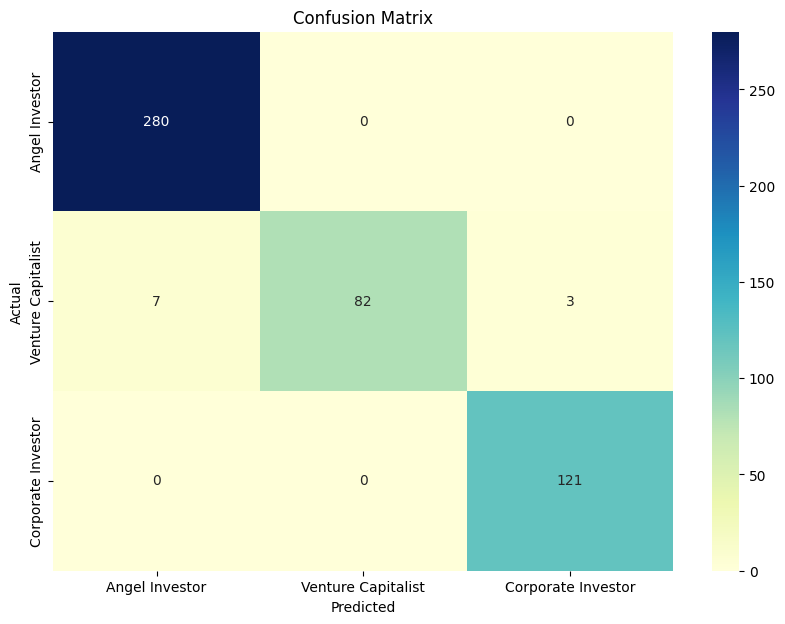

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv("/content/Finalised Dataset.csv")  # Replace with your actual file path

# Calculate thresholds for different investor types based on the 'Amount in USD'
angel_threshold = data['Amount in USD'].quantile(0.50)
venture_threshold = data['Amount in USD'].quantile(0.75)

# Function to classify investors based on thresholds
def classify_investor(row):
    if row['Amount in USD'] <= angel_threshold:
        return 'Angel Investor'
    elif row['Amount in USD'] <= venture_threshold:
        return 'Venture Capitalist'
    else:
        return 'Corporate Investor'

# Apply the function to create a new column 'Investor Type'
data['Investor Type'] = data.apply(classify_investor, axis=1)

# Assuming 'Investment Type_encoded' is already preprocessed and is a feature for prediction
X = data[['Investment Type_encoded', 'Amount in USD']]
y = data['Investor Type']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions
y_pred = gnb.predict(X_test)

# Evaluate the classifier using a confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['Angel Investor', 'Venture Capitalist', 'Corporate Investor'])
print(classification_report(y_test, y_pred))
data.to_csv("/content/Second_question.csv", index=False)
# Confusion Matrix Visualization
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Angel Investor', 'Venture Capitalist', 'Corporate Investor'], yticklabels=['Angel Investor', 'Venture Capitalist', 'Corporate Investor'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Save the updated dataset with the 'Investor Type' column to a new CSV file
  # Replace with your desired output file path


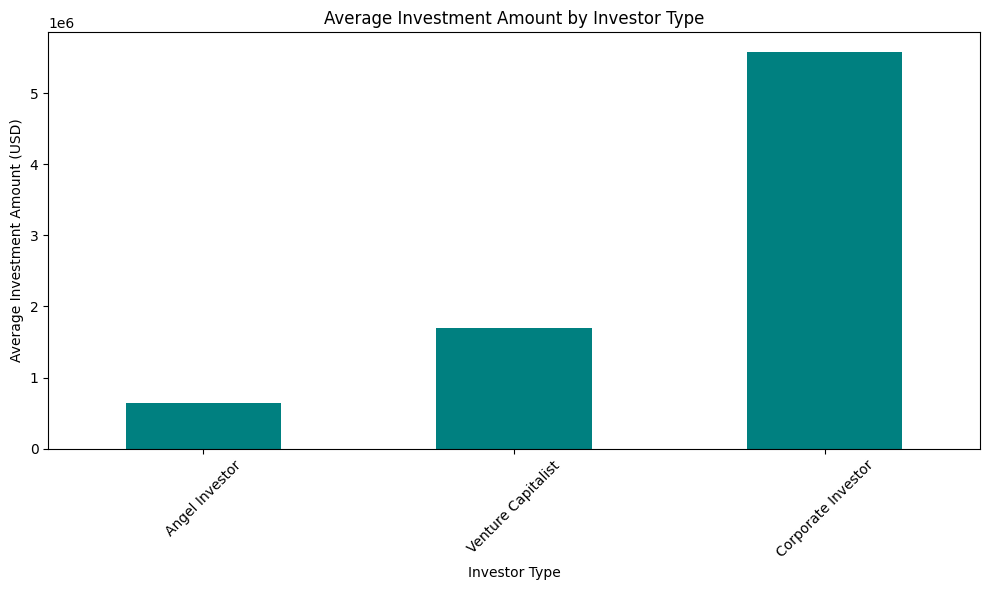

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/Second_question.csv')  # Replace with the path to your dataset

# Assuming the 'Investor Type' has been added to your dataset
# Calculate the average investment amounts for each investor type
average_investments = data.groupby('Investor Type')['Amount in USD'].mean().sort_values()

# Plot a bar chart
plt.figure(figsize=(10, 6))
average_investments.plot(kind='bar', color='#008080')
plt.title('Average Investment Amount by Investor Type')
plt.xlabel('Investor Type')
plt.ylabel('Average Investment Amount (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Load your dataset
df = pd.read_csv('/content/transformed_dataset_label_encoded.csv')  # Replace with the path to your dataset

# Encode categorical variables
label_encoder = LabelEncoder()
df['SubVertical_encoded'] = label_encoder.fit_transform(df['SubVertical'])
df['City_Location_encoded'] = label_encoder.fit_transform(df['City Location'])

# Decision Tree for the 2nd Question
# Select features and target for decision tree classifier
X_dt = df[['SubVertical_encoded', 'Amount in USD']]
y_dt = df['Investors Name']  # Replace with the appropriate target variable for investors

# Split the dataset into training and test sets for decision tree classifier
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=0.2, random_state=42)

# Initialize and train the DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_dt, y_train_dt)

# Make predictions on the test set
y_pred_dt = decision_tree.predict(X_test_dt)

# Calculate and print the classification report
report = classification_report(y_test_dt, y_pred_dt)
print(report)


                                                                                                                                                                                   precision    recall  f1-score   support

                                                                                                                         1Crowd, Eureka Forbes Ltd, Shapoorji Pallonji & Co. Ltd.       0.00      0.00      0.00         1
                                                                                                                                                               3 undisclosed HNIs       0.00      0.00      0.00         0
                                                                                                                                                          3 undisclosed investors       0.00      0.00      0.00         1
                                                                                                                           

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/transformed_dataset_label_encoded.csv')


# Aggregate the total funding amount by city
funding_by_city = data.groupby('City Location')['Amount in USD'].sum().sort_values(ascending=False)

# Get the top 10 cities
top_10_cities = funding_by_city.head(10)

# Calculate the total funding received by all cities
total_funding = funding_by_city.sum()

# Determine the percentage of total funding for each of the top 10 cities
top_10_cities_percentage = (top_10_cities / total_funding) * 100

# Convert the series to a DataFrame for better visual representation
top_10_cities_percentage_df = top_10_cities_percentage.reset_index(name='Funding Percentage')

print(top_10_cities_percentage_df)


  City Location  Funding Percentage
0     Bangalore           26.273801
1        Mumbai           19.313485
2     New Delhi           13.363573
3       Gurgaon            9.198610
4     Bengaluru            5.500274
5       Chennai            4.034251
6     Hyderabad            3.543456
7          Pune            3.445934
8         Noida            3.275366
9      Gurugram            2.386448


In [ ]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your dataset
data = pd.read_csv('/content/transformed_dataset_label_encoded.csv')  # Replace with your dataset path

# Aggregate the funding by city
city_funding = data.groupby('City Location')['Amount in USD'].sum().sort_values(ascending=False)

# Identify the top 10 cities by funding
top_10_cities = city_funding.head(10).index.tolist()

# Create a new binary column 'Is_Top_10' to label whether a city is in the top 10
data['Is_Top_10'] = data['City Location'].apply(lambda x: 'Yes' if x in top_10_cities else 'No')

# Prepare the data for the SVM model
# Standardize the 'Amount in USD' feature since SVM is sensitive to the scale of input features
scaler = StandardScaler()
X = scaler.fit_transform(data[['Amount in USD']])

# Convert labels to binary (1 for 'Yes', 0 for 'No')
y = data['Is_Top_10'].apply(lambda x: 1 if x == 'Yes' else 0)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM classifier with a linear kernel
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

# Predict on the entire dataset
data['SVM_Predicted_Top_10_City'] = clf.predict(scaler.transform(data[['Amount in USD']]))

# Convert binary predictions back to 'Yes' or 'No'
data['SVM_Predicted_Top_10_City'] = data['SVM_Predicted_Top_10_City'].apply(lambda x: 'Yes' if x == 1 else 'No')

# Save the updated dataset with the 'SVM_Predicted_Top_10_City' column to a new CSV file
output_file = '/content/new_dataset_with_svm_predictions2.csv'  # Replace with your desired output file path
data.to_csv(output_file, index=False)

print(f"The updated data with SVM predictions has been saved to {output_file}")


The updated data with SVM predictions has been saved to /content/new_dataset_with_svm_predictions2.csv


In [ ]:
from scipy.stats import f_oneway
import pandas as pd

# Load your dataset
data = pd.read_csv('/content/transformed_dataset_label_encoded.csv')  # Replace with your dataset path

# Ensure there are no NaN values in these columns or handle them appropriately
data = data.dropna(subset=['Amount in USD', 'Investment Type_encoded'])

# Preparing data for ANOVA test
investment_types = data['Investment Type_encoded'].unique()
anova_data = [data['Amount in USD'][data['Investment Type_encoded'] == investment_type] for investment_type in investment_types]

# Conducting ANOVA test
anova_result = f_oneway(*anova_data)
print(anova_result)


F_onewayResult(statistic=29.749613083866056, pvalue=5.363684689310923e-175)


In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd

# Load your dataset
data = pd.read_csv('/content/Second_question.csv')  # Replace with your dataset path

# Creating a contingency table
contingency_table = pd.crosstab(data['Investor Type'], data['City Location'])

# Conducting Chi-square test
chi2_result = chi2_contingency(contingency_table)
print(chi2_result)


Chi2ContingencyResult(statistic=218.13538924519116, pvalue=0.013002803194736479, dof=174, expected_freq=array([[1.11561866e+00, 1.11561866e+00, 5.57809331e-01, 2.00811359e+01,
        5.57809331e-01, 5.57809331e-01, 3.44726166e+02, 5.57809331e-01,
        5.57809331e-01, 5.57809331e-01, 5.57809331e-01, 1.11561866e+00,
        5.57809331e-01, 5.29918864e+01, 5.57809331e-01, 1.67342799e+00,
        5.57809331e-01, 5.57809331e-01, 5.57809331e+00, 5.57809331e-01,
        4.57403651e+01, 5.57809331e-01, 2.78904665e+00, 5.57809331e-01,
        1.78498986e+01, 5.57809331e-01, 5.57809331e-01, 5.57809331e-01,
        5.57809331e+00, 5.57809331e-01, 1.29411765e+02, 5.57809331e-01,
        2.17545639e+01, 1.11561866e+00, 5.57809331e-01, 5.07606491e+01,
        5.57809331e-01, 7.25152130e+00, 1.56186613e+01, 5.57809331e-01,
        2.23123732e+00, 5.57809331e-01, 5.57809331e-01, 5.57809331e-01,
        1.11561866e+00, 1.17139959e+01, 5.57809331e-01, 5.57809331e-01,
        5.57809331e-01, 5.578093

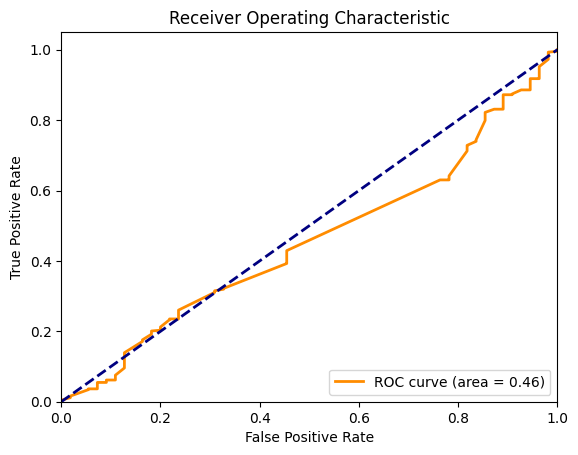

The updated data with SVM predictions has been saved to /content/dataset_with_svm_predictions.csv


In [ ]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/transformed_dataset_label_encoded.csv')  # Make sure to provide the correct path

# Aggregate the funding by city and reset index to turn grouped data into a DataFrame
city_funding = data.groupby('City Location')['Amount in USD'].sum().reset_index()

# Sort cities by total funding to identify the top 10 unique city names
sorted_cities = city_funding.sort_values('Amount in USD', ascending=False)
top_10_cities = sorted_cities['City Location'].unique()[:10]

# Determine the funding threshold - the lowest funding amount in the top 10
top_10_threshold = sorted_cities[sorted_cities['City Location'].isin(top_10_cities)]['Amount in USD'].min()

# Label all cities based on whether their total funding qualifies for top 10
data['Is_Top_10'] = data['City Location'].apply(lambda x: 'Yes' if city_funding[city_funding['City Location'] == x]['Amount in USD'].values[0] >= top_10_threshold else 'No')

# Prepare the data for the SVM model
scaler = StandardScaler()
X = scaler.fit_transform(data[['Amount in USD']].values.reshape(-1, 1))  # Reshape for a single feature
y = data['Is_Top_10'].apply(lambda x: 1 if x == 'Yes' else 0)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM classifier with a linear kernel and probability estimates
clf = svm.SVC(kernel='linear', probability=True)
clf.fit(X_train, y_train)

# Predict probabilities on the test set
y_probs = clf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Predict on the entire dataset
data['SVM_Predicted_Top_10_City'] = clf.predict(X)

# Convert binary predictions back to 'Yes' or 'No'
data['SVM_Predicted_Top_10_City'] = data['SVM_Predicted_Top_10_City'].apply(lambda x: 'Yes' if x == 1 else 'No')

# Save the updated dataset with the 'SVM_Predicted_Top_10_City' column to a new CSV file
output_file = '/content/dataset_with_svm_predictions.csv'  # Replace with your desired output file path
data.to_csv(output_file, index=False)

print(f"The updated data with SVM predictions has been saved to {output_file}")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

  Not Top 10       0.00      0.00      0.00        55
      Top 10       0.89      1.00      0.94       438

    accuracy                           0.89       493
   macro avg       0.44      0.50      0.47       493
weighted avg       0.79      0.89      0.84       493



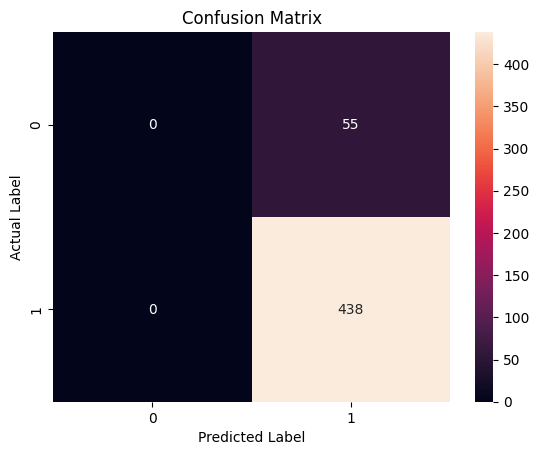

The updated data with SVM predictions has been saved to /content/Datasetwith_svm_predictions.csv


In [ ]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/transformed_dataset_label_encoded.csv')  # Replace with your dataset path

# Assuming 'City Location' is the name of the column with city names
# Assuming 'Amount in USD' is the name of the column with funding amounts

# Aggregate the funding by city and calculate the total funding amount
total_funding_by_city = data.groupby('City Location')['Amount in USD'].sum().reset_index()

# Find the top 10 cities by total funding
top_10_cities_by_funding = total_funding_by_city.nlargest(10, 'Amount in USD')

# Create a set of top 10 city names for easy lookup
top_10_city_names = set(top_10_cities_by_funding['City Location'])

# Label each entry as 'Top 10' or 'Not Top 10' based on the city's total funding
data['Top_10_City'] = data['City Location'].apply(lambda x: 'Yes' if x in top_10_city_names else 'No')

# Prepare the data for the SVM model
# Scale the 'Amount in USD' feature
scaler = StandardScaler()
X = scaler.fit_transform(data[['Amount in USD']].values.reshape(-1, 1))
y = data['Top_10_City'].apply(lambda x: 1 if x == 'Yes' else 0)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM classifier with a linear kernel
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=['Not Top 10', 'Top 10'])
print(report)

# Generate and display a confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Add the SVM predictions to the DataFrame for the entire dataset
data['SVM_Predicted_Top_10_City'] = clf.predict(X)
data['SVM_Predicted_Top_10_City'] = data['SVM_Predicted_Top_10_City'].apply(lambda x: 'Yes' if x == 1 else 'No')

# Save the DataFrame with the new 'SVM_Predicted_Top_10_City' column to a new CSV file
output_file = '/content/Datasetwith_svm_predictions.csv'  # Replace with your desired output file path
data.to_csv(output_file, index=False)

print(f"The updated data with SVM predictions has been saved to {output_file}")


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('/content/New_transformed_dataset_label_encoded.csv')

# Group by 'City_Location' (label encoded) and sum up 'Amount_in_USD'
city_funding = data.groupby('City  Location')['Amount in USD'].sum().sort_values(ascending=False)

# Determine the top 10 cities by total funding amount
top_10_threshold = city_funding.iloc[9]  # The funding amount of the 10th city

# Label each entry in the original dataset as 'Top 10' or 'Not Top 10'
data['Top_10_City'] = data['City  Location'].apply(lambda x: 'Yes' if city_funding.loc[x] >= top_10_threshold else 'No')

# Prepare the data for the SVM model
scaler = StandardScaler()
X = scaler.fit_transform(data[['City  Location_encoded', 'Amount in USD']])
y = data['Top_10_City'].map({'Yes': 1, 'No': 0})

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM classifier
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Generate the classification report
print(classification_report(y_test, y_pred))

# Generate and display a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Predict the 'Top_10_City' for the entire dataset using the trained SVM model
data['SVM_Predicted_Top_10_City'] = svm_model.predict(X)
data['SVM_Predicted_Top_10_City'] = data['SVM_Predicted_Top_10_City'].map({1: 'Yes', 0: 'No'})

# Save the updated dataset with the 'SVM_Predicted_Top_10_City' column to a new CSV file
output_file = '/content/updated_dataset_with_svm_predictions.csv'
data.to_csv(output_file, index=False)

print(f"The updated data with SVM predictions has been saved to {output_file}")


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        55
           1       0.89      1.00      0.94       438

    accuracy                           0.89       493
   macro avg       0.44      0.50      0.47       493
weighted avg       0.79      0.89      0.84       493

[[  0  55]
 [  0 438]]
The updated data with SVM predictions has been saved to /content/updated_dataset_with_svm_predictions.csv


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.93      0.96        82
           1       0.99      1.00      1.00       658

    accuracy                           0.99       740
   macro avg       1.00      0.96      0.98       740
weighted avg       0.99      0.99      0.99       740

[[ 76   6]
 [  0 658]]
The updated data with CART predictions has been saved to /content/Finalised Dataset.csv


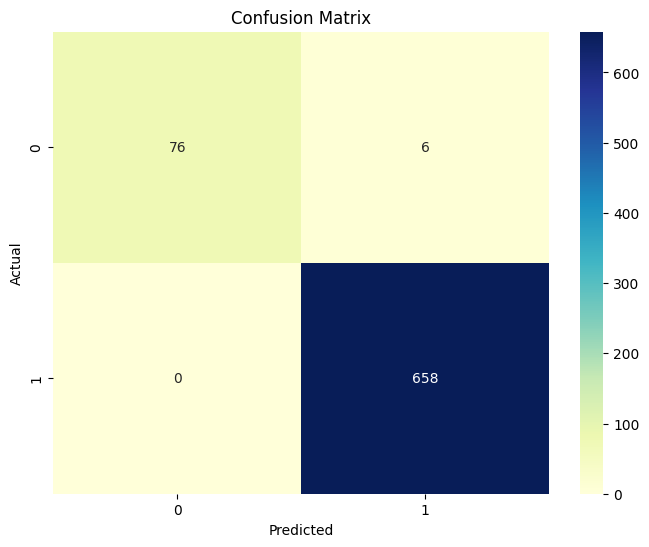

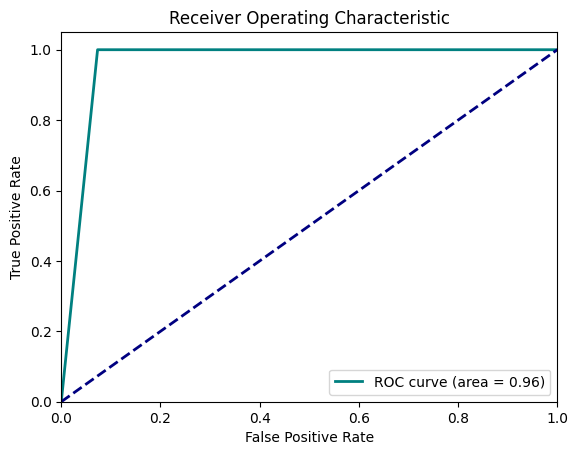

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/Finalised Dataset.csv')

# Calculate the total funding for each 'City Location' and identify the top 10
total_funding = data.groupby('City  Location')['Amount in USD'].sum().sort_values(ascending=False)
top_10_threshold = total_funding.iloc[9]  # Get the 10th highest funding value as the threshold

# Label the dataset with 'Yes' for top 10 cities based on the threshold
data['Top 10 City'] = data['City  Location'].apply(lambda x: 'Yes' if total_funding[x] >= top_10_threshold else 'No')

# Prepare the features and target variable for CART
X = data[['City  Location_encoded', 'Amount in USD']]  # City Location is label encoded
y = data['Top 10 City'].map({'Yes': 1, 'No': 0})

# Since 'City Location' is label-encoded, we assume it's a categorical variable that's been appropriately converted
# If 'City Location' is not ordinal and the label encoding does not represent a meaningful order, consider using one-hot encoding

# Scale the 'Amount in USD' feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize and train the CART model
cart_model = DecisionTreeClassifier(random_state=42)
cart_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = cart_model.predict(X_test)

# Evaluate the model's performance
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Add the CART predictions to the DataFrame for the entire dataset
data['CART Predicted Top 10 City'] = cart_model.predict(X_scaled)
data['CART Predicted Top 10 City'] = data['CART Predicted Top 10 City'].map({1: 'Yes', 0: 'No'})

# Save the updated dataset to a new CSV file
output_file = '/content/Finalised Dataset.csv'
data.to_csv(output_file, index=False)

print(f"The updated data with CART predictions has been saved to {output_file}")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='#008080', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/updated_dataset_with_cart_predictions.csv')

# Extract 'Year' from 'Date' column
# Ensure the 'Date' column is in a datetime format
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Assuming you have a mapping file for 'Industry Vertical_encoded' to 'Industry Vertical',
# and you have already normalized 'Amount in USD' which is available in 'Amount in USD_normalized',
# the following code will select the relevant columns and save them to a new CSV file.
df
# Select the relevant columns to save in the new file
columns_to_save = ['Amount in USD_normalized', 'Amount in USD','City  Location_encoded','City  Location','Top 10 City' ]

# Create a new dataframe with these columns
startup_trend_df = df[columns_to_save]

# Save this dataframe to a new CSV file called StartupTrend.csv
startup_trend_df.to_csv('GeographicalTrend.csv', index=False)

print("The file 'Geographical.csv' has been created.")


The file 'Geographical.csv' has been created.


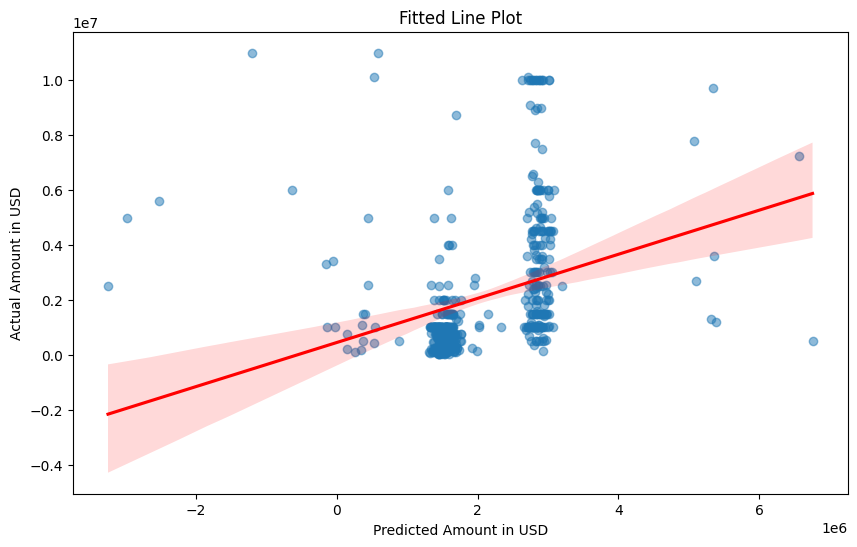

R-squared: 0.09573659017341951
Adjusted R-squared: 0.08832459501090661
Standard Deviation of Residuals: 2308201.5909537254
P-values of the features: const                        6.836505e-103
Industry Vertical_encoded     3.042962e-01
Investment Type_encoded       1.668657e-69
SubVertical_encoded           4.152431e-01
Investors Name_encoded        1.339379e-01
dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Load your dataset
data = pd.read_csv('/content/Finalised Dataset.csv')  # Replace 'your_dataset.csv' with your actual file path

# Selecting the relevant features and the target variable
features = data[['Industry Vertical_encoded', 'Investment Type_encoded', 'SubVertical_encoded', 'Investors Name_encoded']]
target = data['Amount in USD']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

# Creating the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the target variable
y_pred = model.predict(X_test)

# Calculating R-squared and Adjusted R-squared
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

# Standard deviation of the residuals
residuals = y_test - y_pred
std_deviation = np.std(residuals)

# Model coefficients and p-values
X_train_sm = sm.add_constant(X_train)  # adding a constant
model_sm = sm.OLS(y_train, X_train_sm).fit()
p_values = model_sm.pvalues

# Plotting the fitted line plot
plt.figure(figsize=(10,6))
sns.regplot(x=y_pred, y=y_test, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel('Predicted Amount in USD')
plt.ylabel('Actual Amount in USD')
plt.title('Fitted Line Plot')
plt.show()

# Display the results
print('R-squared:', r2)
print('Adjusted R-squared:', adjusted_r2)
print('Standard Deviation of Residuals:', std_deviation)
print('P-values of the features:', p_values)


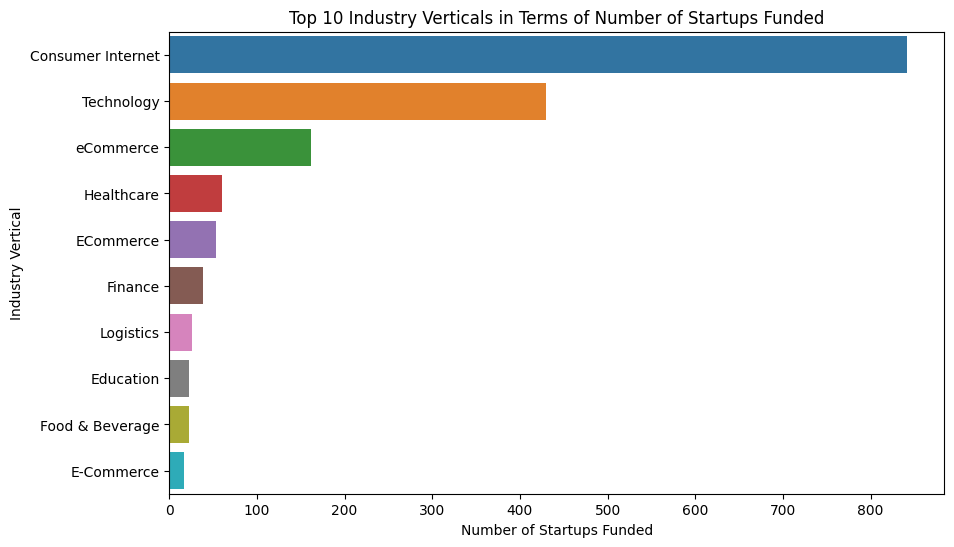

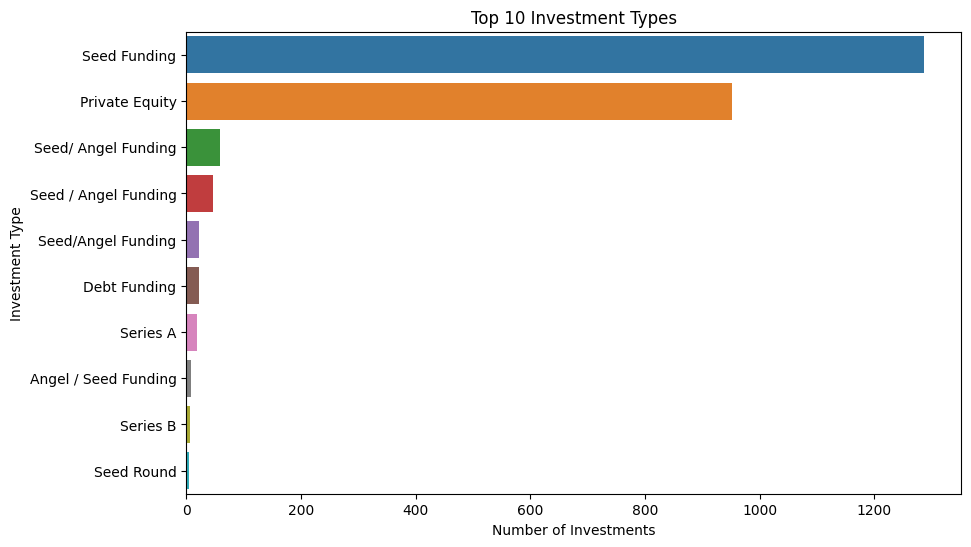

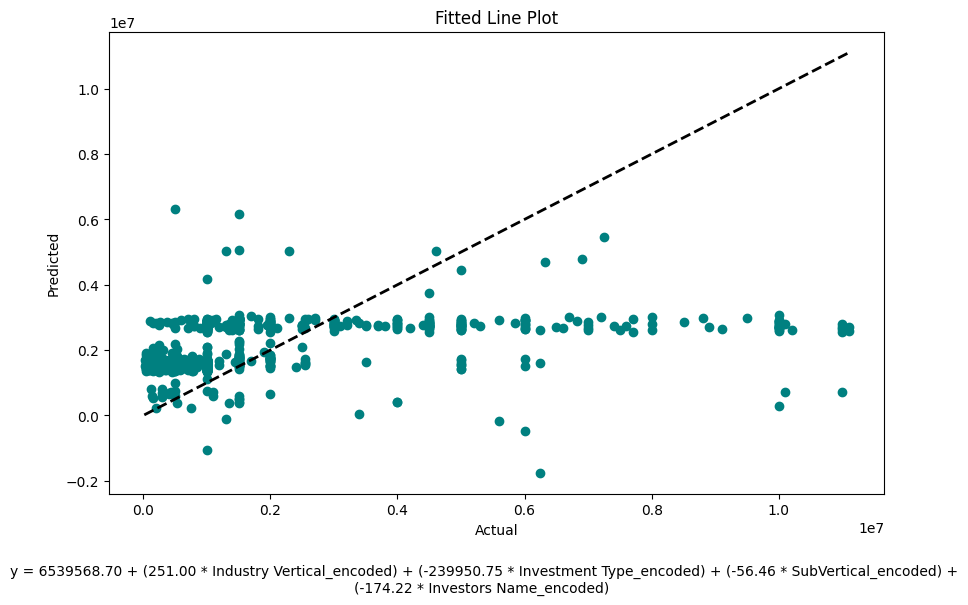

R-squared: 0.14346988918733194
Adjusted R-squared: 0.14207715729983172
Standard Deviation of Residuals: 2270311.2249376313
                            OLS Regression Results                            
Dep. Variable:          Amount in USD   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     66.70
Date:                Fri, 29 Dec 2023   Prob (F-statistic):           1.61e-52
Time:                        19:37:04   Log-Likelihood:                -27614.
No. Observations:                1725   AIC:                         5.524e+04
Df Residuals:                    1720   BIC:                         5.526e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import statsmodels.api as sm

# Load the dataset
data = pd.read_csv('/content/Finalised Dataset.csv')  # Replace with your file path

# Descriptive Analysis
plt.figure(figsize=(10, 6))
sns.countplot(y='Industry Vertical', data=data, order=data['Industry Vertical'].value_counts().index[:10])
plt.title('Top 10 Industry Verticals in Terms of Number of Startups Funded')
plt.xlabel('Number of Startups Funded')
plt.ylabel('Industry Vertical')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(y='Investment Type', data=data, order=data['Investment Type'].value_counts().index[:10])
plt.title('Top 10 Investment Types')
plt.xlabel('Number of Investments')
plt.ylabel('Investment Type')
plt.show()

# Preparing Data for Linear Regression
X = data[['Industry Vertical_encoded', 'Investment Type_encoded', 'SubVertical_encoded', 'Investors Name_encoded']]
y = data['Amount in USD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Model Evaluation
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
std_dev = np.sqrt(mean_squared_error(y_test, y_pred))

# Statsmodels for detailed statistics
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()
model_summary = model_sm.summary()

# Fitted Line Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred,color='#008080')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, )
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Fitted Line Plot')
# Getting coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
feature_names = X.columns

# Formatting regression expression
regression_expression = f'y = {intercept:.2f} '
for coef, name in zip(coefficients, feature_names):
    regression_expression += f'+ ({coef:.2f} * {name}) '

plt.figtext(0.5, -0.05, regression_expression, wrap=True, horizontalalignment='center', fontsize=10, )

plt.show()

# Displaying the results
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adjusted_r2}')
print(f'Standard Deviation of Residuals: {std_dev}')
print(model_summary)


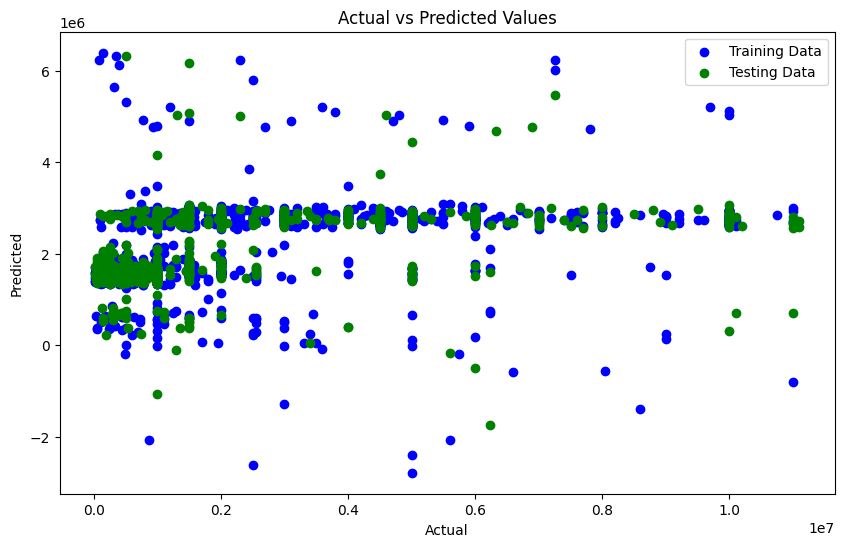

Training MSE: 4697098735552.42
Testing MSE: 5154313058077.808
Training R-squared: 0.13428765965265188
Testing R-squared: 0.14346988918733194
                            OLS Regression Results                            
Dep. Variable:          Amount in USD   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     66.70
Date:                Thu, 28 Dec 2023   Prob (F-statistic):           1.61e-52
Time:                        03:22:00   Log-Likelihood:                -27614.
No. Observations:                1725   AIC:                         5.524e+04
Df Residuals:                    1720   BIC:                         5.526e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import statsmodels.api as sm

# Load the dataset
data = pd.read_csv('/content/Finalised Dataset.csv')  # Replace with your file path

# [Descriptive Analysis here as in the previous script]

# Preparing Data for Linear Regression
X = data[['Industry Vertical_encoded', 'Investment Type_encoded', 'SubVertical_encoded', 'Investors Name_encoded']]
y = data['Amount in USD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Model Evaluation
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Statsmodels for detailed statistics
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()
model_summary = model_sm.summary()

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Training Data')
plt.scatter(y_test, y_test_pred, color='green', label='Testing Data')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

# Displaying the results
print(f'Training MSE: {train_mse}')
print(f'Testing MSE: {test_mse}')
print(f'Training R-squared: {train_r2}')
print(f'Testing R-squared: {test_r2}')
print(model_summary)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load your dataset here
file_path = '/content/Second_question.csv' # Replace with your file path
data = pd.read_csv(file_path)

# Bootstrapping parameters
n_iterations = 1000  # Number of bootstrap samples to create
n_size = int(len(data) * 0.50)  # Taking 50% of the data in each sample

# Arrays to store scores
r2_scores = []
adjusted_r2_scores = []
std_dev_scores = []

for i in range(n_iterations):
    # Prepare bootstrap sample
    boot_sample = resample(data, n_samples=n_size)

    # Selecting features and target from the bootstrap sample
    boot_features = boot_sample[['Industry Vertical_encoded', 'Investment Type_encoded', 'SubVertical_encoded', 'City Location', 'Investor Type']]
    boot_target = boot_sample['Amount in USD']

    # Encoding categorical variables
    boot_features = pd.get_dummies(boot_features, drop_first=True)

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(boot_features, boot_target, test_size=0.2, random_state=i)

    # Creating the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predicting the target variable
    y_pred = model.predict(X_test)

    # Calculating R-squared and Adjusted R-squared
    r2 = r2_score(y_test, y_pred)
    adjusted_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

    # Standard deviation of the residuals
    residuals = y_test - y_pred
    std_deviation = np.std(residuals)

    # Storing scores
    r2_scores.append(r2)
    adjusted_r2_scores.append(adjusted_r2)
    std_dev_scores.append(std_deviation)

# Calculating the average scores
avg_r2 = np.mean(r2_scores)
avg_adjusted_r2 = np.mean(adjusted_r2_scores)
avg_std_dev = np.mean(std_dev_scores)

# Display the average results
print('Average R-squared:', avg_r2)
print('Average Adjusted R-squared:', avg_adjusted_r2)
print('Average Standard Deviation of Residuals:', avg_std_dev)


Average R-squared: -459811423952594.2
Average Adjusted R-squared: -601451396315577.4
Average Standard Deviation of Residuals: 3432809573816.4824


Optimization terminated successfully.
         Current function value: 0.685974
         Iterations 4
Durbin-Watson Statistic: 1.838060113385026
Pseudo R-squared: 0.003763795208866716
P-values:
 const                     0.506155
Investors Name_encoded    0.002849
dtype: float64


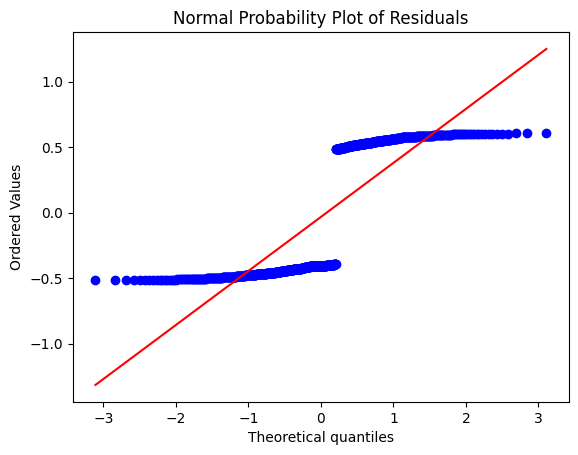

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np

# Load your dataset
file_path = '/content/New_transformed_dataset_label_encoded.csv' # Replace with your file path
data = pd.read_csv(file_path)

# Preparing the data for logistic regression
# Assume 'Amount in USD' is the funding amount and 'Investors Name_encoded' is encoded investor names
median_funding = data['Amount in USD'].median()
data['Above Median Funding'] = (data['Amount in USD'] > median_funding).astype(int)
X = data[['Investors Name_encoded']]  # Independent variable
y = data['Above Median Funding']  # Dependent variable

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Logistic Regression Model
X_train_sm = sm.add_constant(X_train)
model = sm.Logit(y_train, X_train_sm)
result = model.fit()

# Predictions and Residuals
X_test_sm = sm.add_constant(X_test)
y_pred_prob = result.predict(X_test_sm)
residuals = y_test - y_pred_prob

# Normal Probability Plot
plt.figure()
stats.probplot(residuals, plot=plt)
plt.title('Normal Probability Plot of Residuals')

# Durbin-Watson statistic
durbin_watson_stat = sm.stats.durbin_watson(residuals)

# Pseudo R-squared and P-values
pseudo_r_squared = result.prsquared
p_values = result.pvalues

# Displaying results
print("Durbin-Watson Statistic:", durbin_watson_stat)
print("Pseudo R-squared:", pseudo_r_squared)
print("P-values:\n", p_values)

plt.show()


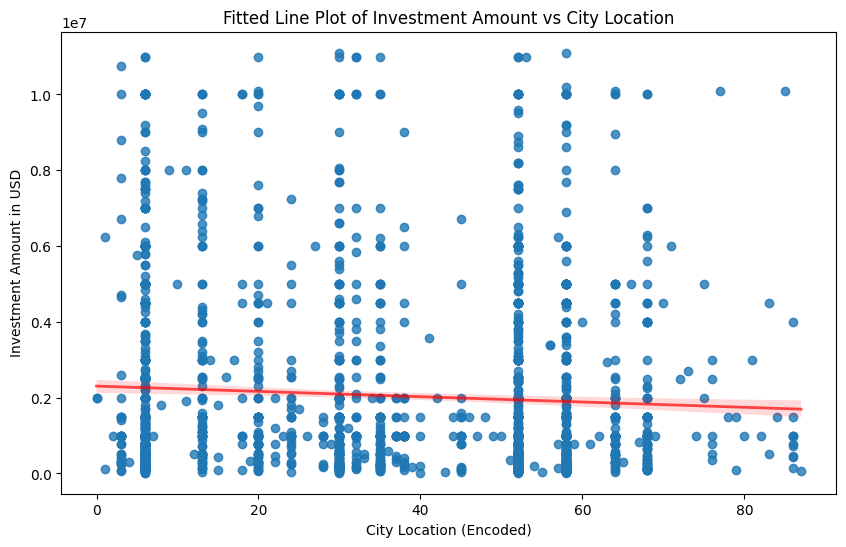

                            OLS Regression Results                            
Dep. Variable:          Amount in USD   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     11.01
Date:                Wed, 27 Dec 2023   Prob (F-statistic):           0.000919
Time:                        01:59:58   Log-Likelihood:                -39672.
No. Observations:                2465   AIC:                         7.935e+04
Df Residuals:                    2463   BIC:                         7.936e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.304e+06    8.8e+04     26.184      0.0

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
# Make sure to replace 'your_data.csv' with the path to your dataset
data = pd.read_csv('/content/Second_question.csv')

# Preparing the data for linear regression
# Encoding the 'City Location' as categorical variables
data['City Location'] = data['City Location'].astype('category')
data['City_Code'] = data['City Location'].cat.codes

# Linear regression
X = sm.add_constant(data['City_Code']) # adding a constant
y = data['Amount in USD']

model = sm.OLS(y, X).fit()

# Plotting
plt.figure(figsize=(10, 6))
sns.regplot(x=data['City_Code'], y=data['Amount in USD'], line_kws={"color":"r","alpha":0.7,"lw":2})
plt.title('Fitted Line Plot of Investment Amount vs City Location')
plt.xlabel('City Location (Encoded)')
plt.ylabel('Investment Amount in USD')
plt.show()

# Summary of the model
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.327674
         Iterations 6


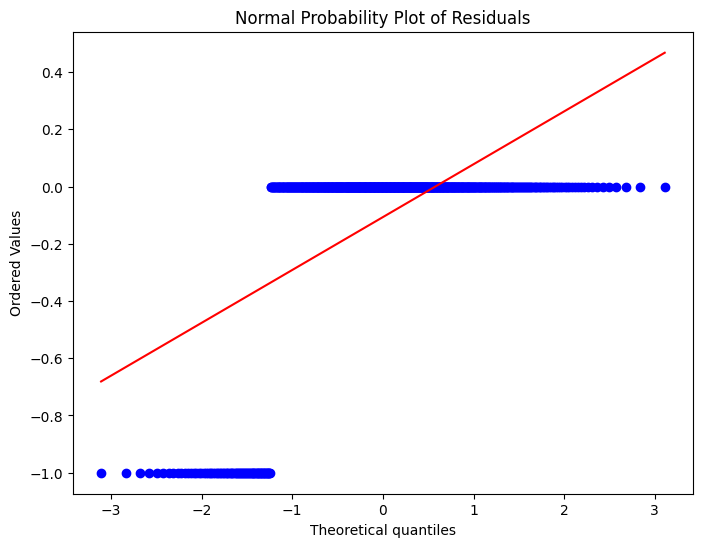

Pseudo R-squared: 0.005596621607206753
Durbin-Watson Statistic: 1.7468354430379747
Chi-Square Statistic: 1749.1857515113613
Chi-Square P-Value: 0.2180851450287707
Chi-Square Degrees of Freedom: 1704


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load your dataset
data = pd.read_csv('/content/Finalised Dataset.csv')  # Replace with your file path

# Convert 'Top 10 City' to a binary variable
data['Top 10 City Binary'] = data['Top 10 City'].map({'Yes': 1, 'No': 0})

# Selecting independent variables for the model
X = data[['Amount in USD', 'SubVertical_encoded']]
y = data['Top 10 City Binary']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Making predictions
y_pred = log_reg.predict(X_test)

# Adding a constant to X_test for statsmodels
X_test_sm = sm.add_constant(X_test)

# Creating a logistic regression model using statsmodels for detailed statistics
model = sm.Logit(y_train, sm.add_constant(X_train))
result = model.fit()

# Durbin-Watson statistic for residuals
residuals = y_test - y_pred
durbin_watson = sm.stats.durbin_watson(residuals)

# Normal Probability Plot for residuals
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normal Probability Plot of Residuals')
plt.show()

# Chi-Square Test for 'Industry Vertical_encoded'
chi2_stat, p_val, dof, ex = stats.chi2_contingency(pd.crosstab(data['Top 10 City Binary'], data['SubVertical_encoded']))

# Calculating Pseudo R-squared and Adjusted R-squared values
r_squared = result.prsquared

# Output the results
print("Pseudo R-squared:", r_squared)
print("Durbin-Watson Statistic:", durbin_watson)
print("Chi-Square Statistic:", chi2_stat)
print("Chi-Square P-Value:", p_val)
print("Chi-Square Degrees of Freedom:", dof)


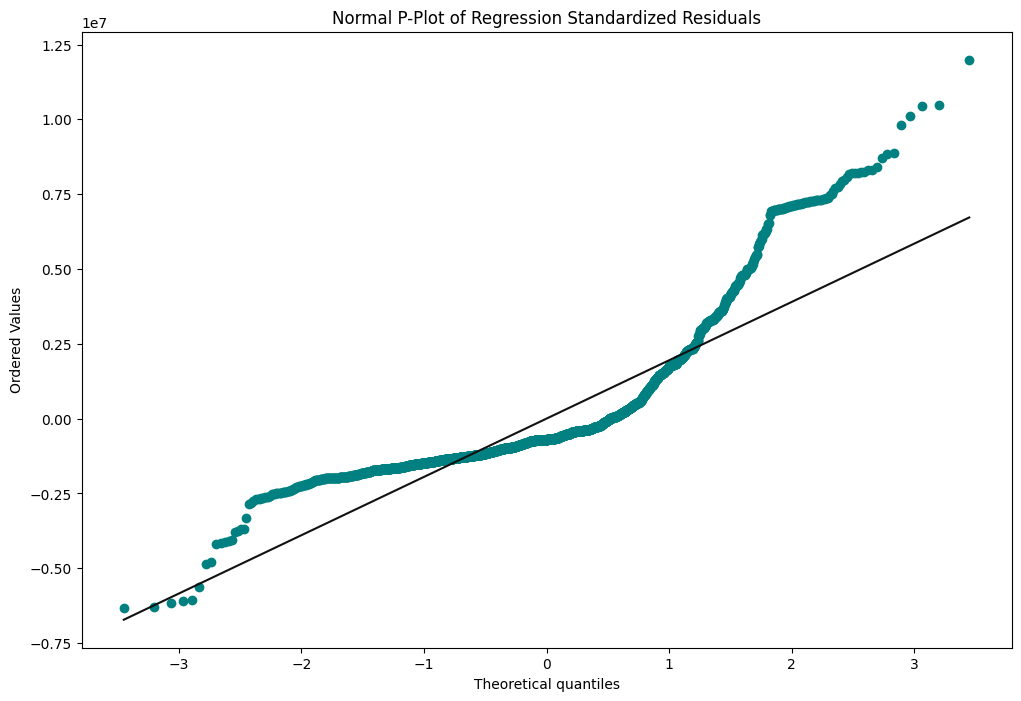

ANOVA Results:
                                       sum_sq      df           F        PR(>F)
Q("Industry Vertical_encoded")  2.126819e+12     1.0    0.440551  5.069187e-01
Q("Investment Type_encoded")    1.869947e+15     1.0  387.342675  3.371260e-80
Q("SubVertical_encoded")        3.629929e+11     1.0    0.075191  7.839469e-01
Q("City  Location_encoded")     4.478556e+13     1.0    9.276924  2.345208e-03
Residual                        1.187597e+16  2460.0         NaN           NaN
R:  0.37450680299394573
R-squared:  0.14025534548874607
Adjusted R-squared:  0.13885738670092285
Durbin-Watson Statistic:  1.7289805283267097


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.metrics import r2_score

# Load your CSV file
file_path = '/content/Finalised Dataset.csv'
data = pd.read_csv(file_path)

# OLS Regression
formula = 'Q("Amount in USD") ~ Q("Industry Vertical_encoded") + Q("Investment Type_encoded") + Q("SubVertical_encoded") + Q("City  Location_encoded")'
model = ols(formula, data=data).fit()

# ANOVA
anova_results = sm.stats.anova_lm(model, typ=2)

# Normal Probability Plot
residuals = model.resid
fig = plt.figure(figsize=(12, 8),)
ax = fig.add_subplot(111)

stats.probplot(residuals, dist='norm', plot=ax, )
ax.get_lines()[0].set_color('#008080')  # Change the color of the scatter plot
ax.get_lines()[1].set_color('#111111')
plt.title('Normal P-Plot of Regression Standardized Residuals')
plt.show()

# Calculating the statistics
r_value = model.rsquared ** 0.5
r_squared_value = model.rsquared

adjusted_r_squared_value = model.rsquared_adj
durbin_watson_statistic = sm.stats.stattools.durbin_watson(model.resid)

# Display the results
print("ANOVA Results:\n", anova_results)
print("R: ", r_value)
print("R-squared: ", r_squared_value)
print("Adjusted R-squared: ", adjusted_r_squared_value)
print("Durbin-Watson Statistic: ", durbin_watson_statistic)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

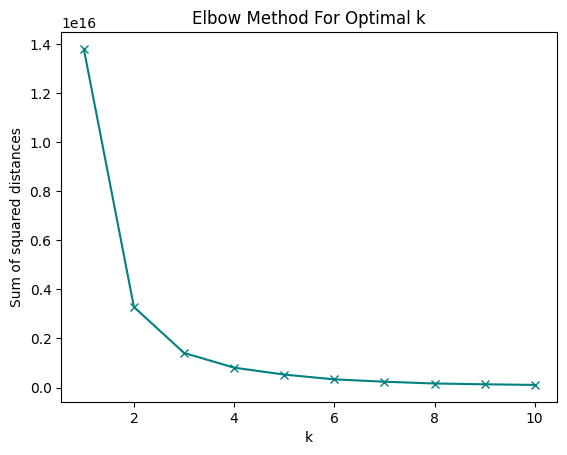

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/Finalised Dataset.csv')

# Selecting a column for clustering, for example, 'Amount in USD'
# Note: Ensure to preprocess your data as needed
clustering_data = data[['Amount in USD']].dropna()  # Dropping missing values

# Elbow method
sum_of_squared_distances = []
K = range(1, 11)  # Using 1 to 10 clusters
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(clustering_data)
    sum_of_squared_distances.append(km.inertia_)

# Plotting with teal color
plt.plot(K, sum_of_squared_distances, 'bx-', color='teal')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()
